## This notebook is for generating test figures of some of the clusters in the database

Once we pick out the most important features, we'll want to make some comparisons between, for example, the least and most concentrated cluster in the sample with a relatively fixed mass/redshift.

In [2]:
import numpy as np
from astropy.io import fits
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from useful_functions.plotter import plot
%matplotlib inline

In [3]:
fig_dir = '../figs/'

In [4]:
#most caS: 870979 w/ radius 78.9261 pix (and largest caS value)
#high caS: 870978 w/ radius 71.596748 pix
#lower caS: 921366 w/ radius 22.445345 pix

#low concentration 870972 w/ rad 74.257561 pix and c=0.061
#higher c: 921320 w/ radius 27.190815 and c=0.117857

cluster_id = 870979

head = fits.open('/home/sbg/magneticum/%d.fits' % cluster_id)
data = fits.open('/home/sbg/magneticum/%d.fits' % cluster_id)[0].data

In [5]:
np.sum(data)

41851.0

In [6]:
np.where(data == np.max(data))

(array([192]), array([192]))

In [7]:
np.log10(np.ma.array (data, mask=(data==0))[0,0])

/home/sbg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


masked_array(data=--,
             mask=True,
       fill_value=1e+20,
            dtype=float64)

/home/sbg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


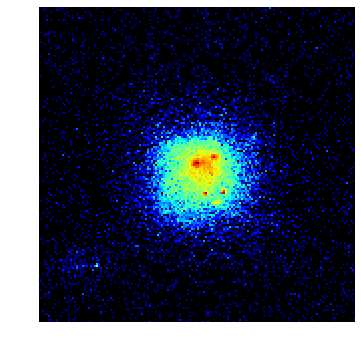

In [8]:
masked_array = np.log10(np.ma.array (data, mask=(data==0)));
cmap = cm.jet
cmap.set_bad('black',1.)
fig, ax = plot()
ax.imshow(masked_array, interpolation='nearest', cmap=cmap, origin='lower')
plt.axis('off')
#plt.xlabel('$x$')
#plt.ylabel('$y$')
#plt.title('Sample cluster, log10 transform pixel count')
rad = 79
plt.xlim(191-rad,192+rad)
plt.ylim(191-rad,192+rad)

plt.savefig(fig_dir+'low_caS_%d.pdf' % cluster_id, bbox_inches='tight')